# Exploring 5 Years of European Football
## Intro
Let me introduce the  modern metrics in football (xG, xGA and xPTS) and its' influence in sport analytics.

* Expected Goals (xG) - measures the quality of a shot based on several variables such as assist type, shot angle and distance from goal, whether it was a headed shot and whether it was defined as a big chance.

* xG_diff - difference between actual goals scored and expected goals.

* Expected Assits (xGA) - measures the likelihood that a given pass will become a goal assist. It considers several factors including the type of pass, pass end-point and length of the pass.

* Expected Points (xPTS) - measures the likelihood of a certaing game to bring points to the team.

* ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

* oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

# The Questions

* Find out the best teams and best leagues

* What is the special feature of winner teams? why do they win?

    - Which winner team create more chances to score a goal?

    - Which winner team play more defensive/offensive football?

* Is there any particular characteristic of each league?



In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999
print("complete")

complete


# Loading the data

In [2]:
df = pd.read_csv("../input/extended-football-stats-for-european-leagues-xg/understat.com.csv", )

In [3]:
df = df.rename(index=int,columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year'}) 
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.98,-7.02,97.78,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.77,-22.23,86.10,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.05,-9.95,52.59,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.06,-14.94,49.70,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.53,-1.47,62.09,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        684 non-null    object 
 1   year          684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

In [5]:
df.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00,684.00
mean,"2,016.50",10.06,35.94,13.43,9.07,13.43,48.19,48.19,49.37,47.06,-1.13,42.90,47.06,-1.13,42.90,-0.00,10.91,10.91,208.68,208.68,49.54,0.17
std,1.71,5.58,3.20,5.88,2.94,5.51,17.61,13.87,16.96,14.60,6.85,13.70,11.78,6.66,11.00,19.29,2.52,3.30,83.89,54.71,13.56,7.16
min,"2,014.00",1.00,27.00,2.00,2.00,1.00,13.00,15.00,13.00,15.06,-30.96,13.17,16.84,-29.18,16.08,-42.21,5.68,4.39,76.00,83.00,17.91,-24.72
25%,"2,015.00",5.00,34.00,9.00,7.00,9.00,36.00,38.00,38.00,37.13,-4.99,33.81,38.92,-5.70,35.47,-13.26,9.09,8.81,151.75,170.00,39.47,-4.50
50%,"2,016.50",10.00,38.00,12.00,9.00,14.00,45.00,48.00,46.00,44.71,-0.61,40.07,47.31,-0.92,43.03,-3.13,10.56,10.35,188.00,205.00,47.10,0.12
75%,"2,018.00",15.00,38.00,16.00,11.00,17.00,56.00,58.00,59.25,53.86,3.59,49.22,54.83,3.38,50.26,9.74,12.43,12.19,242.00,246.25,56.94,4.91
max,"2,019.00",20.00,38.00,32.00,18.00,29.00,118.00,94.00,100.00,113.60,18.15,99.48,88.43,16.37,78.54,73.05,21.90,30.47,582.00,375.00,94.38,23.05


# The Answers

## Find out the best teams and best leagues

First, let's find out the league which has the highst xG_value, xG_diff value using with football metrics

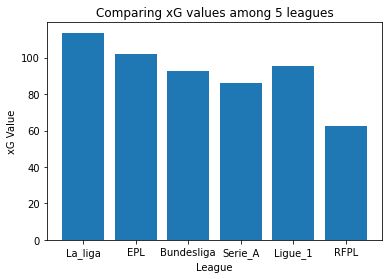

In [6]:
fig, ax = plt.subplots()

ax.bar(data=df, x='league',height='xG')

ax.set(title='Comparing xG values among 5 leagues',
      xlabel='League',
      ylabel='xG Value')

plt.show()

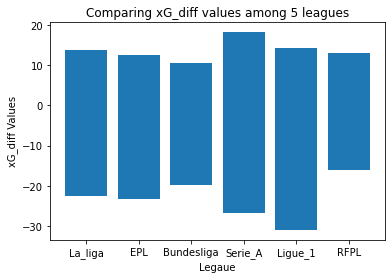

In [7]:
fig, ax= plt.subplots()

ax.bar(data=df, x='league', height='xG_diff')

ax.set(title="Comparing xG_diff values among 5 leagues",
      xlabel="Legaue",
      ylabel="xG_diff Values")

plt.show()

<AxesSubplot:xlabel='league', ylabel='xG_diff'>

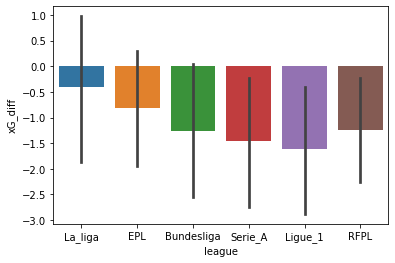

In [8]:
sns.barplot(data=df, x='league', y='xG_diff')

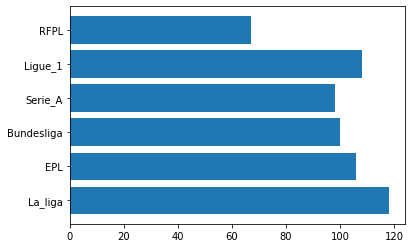

In [9]:
fig, ax = plt.subplots()

ax.barh(data=df, y='league', width=df['scored'])

plt.show()

Actually it is really hard to decide which league is the best only with xG or xG_diff values. It's because of that it's just rare to get many goals in football. It means that it can happen that we see very low goal score or xG value even in best league and one more reason is that it depends on the feature of league.
<br>
But those graph show that EPL and La_liga are the best leagues only considering with xG value, xG_diff and score.

# Exploring which teams are the best from best leagues.

## EPL

Let's consider only EPL and La liga, since they are the best leagues in europe.
<br>
First starting with **EPL**, let's find out best 4 teams since only top 4 teams can play by champions league, which is the most popular football event in the world.

In [10]:
epl = df[df['league'] == "EPL"]

In [11]:
epl.head(3)

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
120,EPL,2014,1,Chelsea,38,26,9,3,73,32,87,68.64,-4.36,64.74,31.52,-0.48,29.24,35.50,10.94,13.42,407,171,75.32,-11.68
121,EPL,2014,2,Manchester City,38,24,7,7,83,38,79,75.82,-7.18,69.61,40.50,2.50,37.45,32.15,7.98,15.08,575,144,73.10,-5.90
122,EPL,2014,3,Arsenal,38,22,9,7,71,36,75,69.80,-1.20,64.47,35.72,-0.28,33.44,31.04,8.66,13.25,398,171,75.17,0.17


Grouping with number of wins.

In [12]:
epl.groupby('team')[['wins','xG','scored']].sum().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Manchester City,156,509.22,537
Liverpool,139,404.83,451
Chelsea,130,384.28,411
Tottenham,126,365.55,415
Arsenal,119,394.80,416


In [13]:
epl.groupby('team')[['wins','xG','scored']].mean().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Manchester City,26.00,84.87,89.50
Liverpool,23.17,67.47,75.17
Chelsea,21.67,64.05,68.50
Tottenham,21.00,60.93,69.17
Arsenal,19.83,65.80,69.33


Let's make some visual to check exatly the number of wins for each team.

In [14]:
epl_grouping = epl.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)

epl_grouping.reset_index(inplace=True)

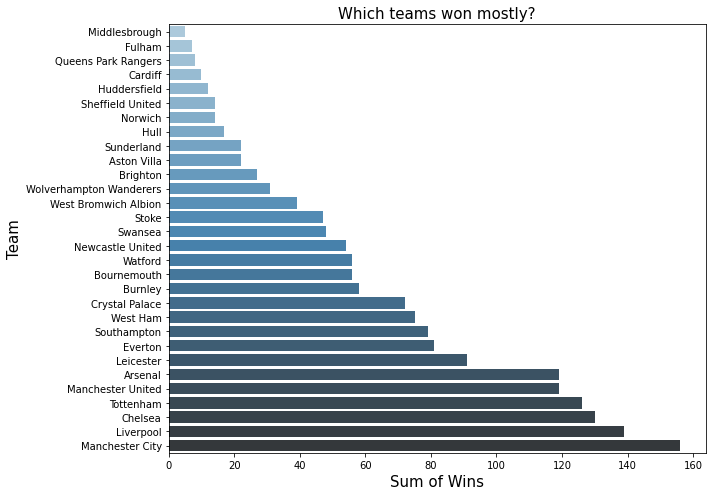

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(data=epl_grouping, x='wins', y='team', palette="Blues_d")

plt.title("Which teams won mostly?", size=15)
plt.xlabel('Sum of Wins', size=15)
plt.ylabel('Team', size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

Last, let's check out the change of position for top 6 teams.

<Figure size 720x576 with 0 Axes>

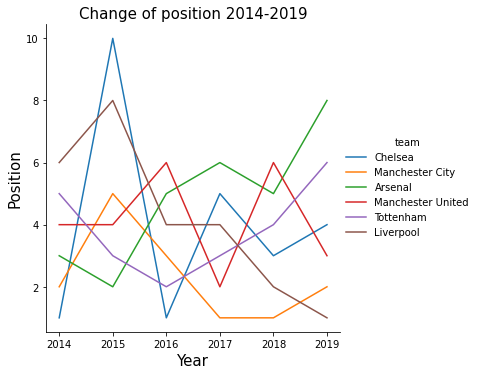

In [16]:
top_6 = ['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham', 'Manchester United', 'Arsenal']
top_6_data = epl[epl['team'].isin(top_6)]

plt.figure(figsize=(10,8))
sns.relplot(data=top_6_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2014-2019", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()


This shows that Liverpool is getting better from 2015 to 2019 but Arsenal is getting worse.
<br>
And it seems that leverpool and manchester city are very competitive for the league title.

When you are talking about football, it is all about, which team have won the game. It doesn't matter how many goals the team scored, when they lose the game, then they are not winner.
<br>
And even considering other conditions like xG values and goal score, we can say that, the top 4 teams in EPL are :
<br>
1. Manchester City  
2. Liverpool                                    
3. Chelsea                   
4. Tottenham  

**So, we can ask the real question now.
<br>
what is the special feature of winner teams? why do they win?
<br>
It's because of that the winner teams play offensive or deffensive? and what about xG and xpts(expected points) value? 
<br>
Let's answer all those questions.**

First, we need **ppda_coef** value to know if the winners play offensive. To play offensive means that they pressure a lot 
<br>
on the other hand, we need **oppda_coef** value to know if the winners play deffensive.

In [17]:
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.98,-7.02,97.78,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.77,-22.23,86.10,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.05,-9.95,52.59,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.06,-14.94,49.70,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.53,-1.47,62.09,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61


In [18]:
winner_teams = ['Manchester City', 'Liverpool']
df_winner_teams = epl[epl['team'].isin(winner_teams)]
winner_teams_groupping = df_winner_teams.groupby('team')[['ppda_coef', 'oppda_coef']].sum()
winner_teams_groupping.reset_index(inplace=True)
winner_teams_groupping

,team,ppda_coef,oppda_coef
0,Liverpool,55.41,110.71
1,Manchester City,47.49,129.17


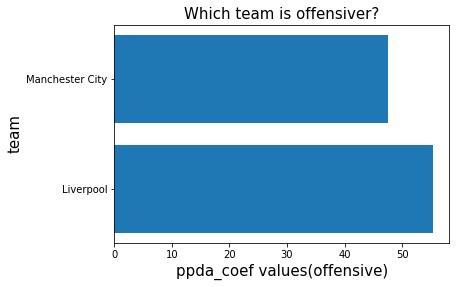

In [19]:
fig, ax = plt.subplots()

ax.barh(data=winner_teams_groupping, y='team', width='ppda_coef')

plt.title('Which team is offensiver?', size= 15)
plt.xlabel('ppda_coef values(offensive)', size= 15)
plt.ylabel('team', size= 15)
plt.show()

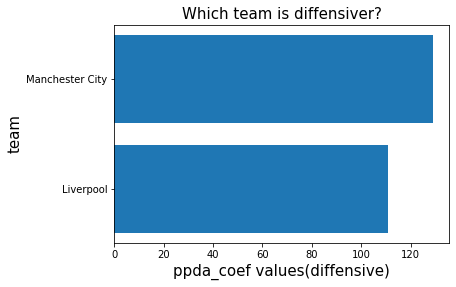

In [20]:
fig, ax = plt.subplots()

ax.barh(data=winner_teams_groupping, y='team', width='oppda_coef')

plt.title('Which team is diffensiver?', size= 15)
plt.xlabel('ppda_coef values(diffensive)', size= 15)
plt.ylabel('team', size= 15)
plt.show()

This shows clearly that **liverpool** plays more offensive than manchester city.
<br>
And manchester city plays more diffensive.

In [21]:
winner_teams_groupping = df_winner_teams.groupby('team')[['xpts', 'xpts_diff']].sum()
winner_teams_groupping.reset_index(inplace=True)
winner_teams_groupping

,team,xpts,xpts_diff
0,Liverpool,431.41,-37.59
1,Manchester City,497.13,-4.87


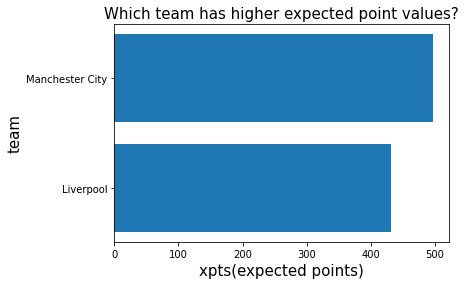

In [22]:
fig, ax = plt.subplots()

ax.barh(data=winner_teams_groupping, y='team', width='xpts')

plt.title('Which team has higher expected point values?', size= 15)
plt.xlabel('xpts(expected points)', size= 15)
plt.ylabel('team', size= 15)
plt.show()

However, when it comes to the points, which are very important to win the title, **manchester city** is absolute better than liverpool

In [23]:
df_winner_teams.groupby('team')[['xG', 'xG_diff']].sum()

,xG,xG_diff
team,,
Liverpool,404.83,-46.17
Manchester City,509.22,-27.78


Again, manchester city is much better than liverpool, when it comes to xG value.

In [24]:
df_winner_teams.groupby('team')[['wins', 'draws', 'loses', 'scored', 'missed']].sum()

,wins,draws,loses,scored,missed
team,,,,,
Liverpool,139,52,37,451,233
Manchester City,156,34,38,537,203


It would be possible to say that manchester city plays better football than liverpool with those results.

# What is the special feature of winner teams in EPL? why do they win?
    - Which winner team create more chances to score a goal?
    - Which winner team play more defensive/offensive football?
It sounds too obvious but the winner teams has higher xG, xpts values than other teams. But to play offensive or deffensive is not the key to be a winner.
<br>
Manchester city has the highst xG value in EPL, that means they create more chances to score a goal than other teams.
<br>
Liverpool plays very offensive football than manchester city.


# La liga

Now we explore the la liga.

In [25]:
la_liga = df[df['league'] == "La_liga"]
la_liga.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.98,-7.02,97.78,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.77,-22.23,86.10,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.05,-9.95,52.59,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.06,-14.94,49.70,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.53,-1.47,62.09,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61


In [26]:
la_liga.groupby('team')[['scored', 'xG', 'wins']].sum().sort_values(by='wins', ascending=False).head()

,scored,xG,wins
team,,,
Barcelona,613,555.91,166
Real Madrid,561,509.19,156
Atletico Madrid,364,333.50,137
Sevilla,356,377.40,111
Villarreal,317,325.56,99


In [27]:
la_liga.groupby('team')[['scored', 'xG', 'wins']].mean().sort_values(by='wins', ascending=False).head()

,scored,xG,wins
team,,,
Barcelona,102.17,92.65,27.67
Real Madrid,93.50,84.86,26.00
Atletico Madrid,60.67,55.58,22.83
Sevilla,59.33,62.90,18.50
Villarreal,52.83,54.26,16.50


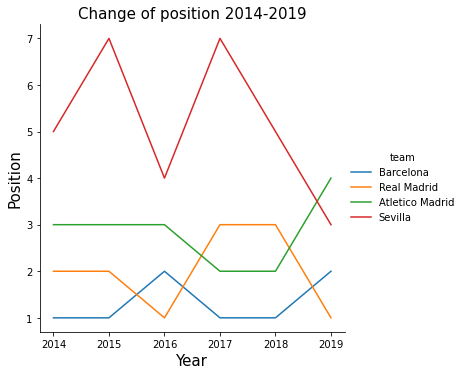

In [28]:
top_4 = ['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Sevilla']
top_4_data = la_liga[la_liga['team'].isin(top_4)]

sns.relplot(data=top_4_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2014-2019", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()


Barcelona got the league title except 2016, 2019 season, when real madrid then got the legaue title, while atletico and sevilla were even not close for that.

Like we did before by EPL, let's answer all those questions again.
<br>

**what is the special feature of winner teams? why do they win?
<br>
It's because of that the winner teams play offensive or deffensive? and what about xG and xpts(expected points) value?**
<br>

In [29]:
winner_teams = ['Barcelona', 'Real Madrid']
la_df_winner_teams = la_liga[la_liga['team'].isin(winner_teams)]
la_winner_teams_groupping = la_df_winner_teams.groupby('team')[['ppda_coef', 'oppda_coef']].sum()
la_winner_teams_groupping.reset_index(inplace=True)
la_winner_teams_groupping

,team,ppda_coef,oppda_coef
0,Barcelona,44.78,95.45
1,Real Madrid,56.67,84.17


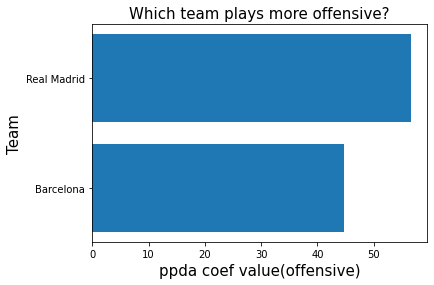

In [30]:
fig, ax = plt.subplots()

ax.barh(data=la_winner_teams_groupping, y='team', width='ppda_coef')

plt.title("Which team plays more offensive?", size=15)
plt.xlabel("ppda coef value(offensive)", size=15)
plt.ylabel("Team", size=15)
plt.show()

In [31]:
la_winner_teams_groupping = df_winner_teams.groupby('team')[['xpts', 'xpts_diff']].sum()
la_winner_teams_groupping.reset_index(inplace=True)
la_winner_teams_groupping

,team,xpts,xpts_diff
0,Liverpool,431.41,-37.59
1,Manchester City,497.13,-4.87


In [32]:
la_winner_teams_groupping = df_winner_teams.groupby('team')[['xG', 'xG_diff']].sum()
la_winner_teams_groupping.reset_index(inplace=True)
la_winner_teams_groupping

,team,xG,xG_diff
0,Liverpool,404.83,-46.17
1,Manchester City,509.22,-27.78


In [33]:
la_df_winner_teams.groupby('team')[['wins', 'draws', 'loses', 'scored', 'missed']].sum()

,wins,draws,loses,scored,missed
team,,,,,
Barcelona,166,39,23,613,190
Real Madrid,156,38,34,561,228


# What is the special feature of winner teams in La liga? why do they win?
    - Which winner team create more chances to score a goal?
    - Which winner team play more defensive/offensive football?

Like we saw before by EPL, the special features of winner are high xG, xpts values. Even though Real Madrid plays more offensive, barcelona has more goal score than real Real Madrid.

# Is there any particular characteristic of each league?

In [34]:
best_leagues = ['EPL', 'La_liga']
df_best_leagues = df[df['league'].isin(best_leagues)]

df_best_leagues.groupby('league')[['scored', 'xG', 'ppda_coef', 'xpts']].mean()

,scored,xG,ppda_coef,xpts
league,,,,
EPL,51.58,50.76,11.85,52.56
La_liga,50.99,50.59,9.65,52.44


# Conclusion

As well known, EPL is very aggressive league. and this proves that EPL has higher ppda_coef value than la_liga.
<br>
we figured out the best leagues, teams and compared them each other with many values like xG, xpts. And from that we could know, that Manchester city and Barcelona are the champions in their own leagues. But since it's very rare by football to score a lot of goals compared with like basketball or Hockey, we should also consider of luck and also many other different features.